In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statistics
import scipy.stats
from sklearn.model_selection import train_test_split

In [2]:
# φόρτωση δεδομένων
ded=pd.read_excel('CogTEL_new.xlsx')

In [3]:
# μετατροπή αλφαριθμητικών σε float και παράλληλα μετατροπή "-" σε NaN
ded['education']=pd.to_numeric(ded['education'],errors='coerce')
ded['GDS_6']=pd.to_numeric(ded['GDS_6'],errors='coerce')
ded['GDS_8']=pd.to_numeric(ded['GDS_8'],errors='coerce')
ded['GDS_9']=pd.to_numeric(ded['GDS_9'],errors='coerce')
ded['NPIJ32F']=pd.to_numeric(ded['NPIJ32F'],errors='coerce')

In [4]:
# για να μπορώ να εξάγω τις συγκεκριμένες στήλες (αχρείαστο βήμα...)
ded = ded.rename(columns={'Antidepressants ': 'Antidepressants' })
ded = ded.rename(columns={'Concentration/attention' : 'Concentration_attention'})

In [5]:
# αφαίρεση στιγμιοτύπων με missing values
ded=ded.dropna()

In [6]:
# απαιτούμε την εμφάνιση ολόκληρου του συνόλου δεδομένων 
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
# αφαίρεση των παραδειγμάτων ηλικίας 50 και κάτω
dedomena=ded[ded['Age']>49]

In [8]:
dedomena.shape

(504, 61)

In [9]:
dedomena.describe()

,Age,Sex,education,diagnosis,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,70.410714,1.660714,10.392857,0.918651,0.301587,0.496032,0.355159,0.309524,0.394841,0.376984,0.375000,0.230159,0.367063,0.480159,0.095238,0.109127,0.279762,0.244048,0.111111,0.295635,3.335317,2.662698,1.716270,0.922619,2.204365,1.551587,0.305556,1.517857,2.944444,5.503968,0.093254,0.148810,0.077381,0.148810,0.267857,0.567460,0.623016,1.543651,0.855159,2.194444,0.067460,0.107143,0.394841,0.900794,0.033730,0.053571,0.498016,1.168651,0.075397,0.152778,0.466270,1.236111,0.301587,0.742063,0.214286,3.682540,4.738095,5.890873,15.494048,2.349206,3.613095
std,8.826355,0.473937,4.412663,0.955953,0.459403,0.500481,0.479037,0.462757,0.489302,0.485112,0.484604,0.421353,0.482483,0.500103,0.293835,0.312108,0.449328,0.429948,0.314582,0.456781,1.508314,0.728105,0.550486,0.274793,1.148904,0.694567,0.461100,0.715963,1.878223,1.112009,0.464692,0.724245,0.408610,0.710388,0.694825,1.332949,0.860409,1.819400,0.869664,1.828069,0.393047,0.630904,0.788116,1.584618,0.297192,0.453731,0.843638,1.748993,0.401624,0.742405,0.761168,1.751400,0.685201,1.504446,0.410734,1.935956,2.246901,3.111895,8.524783,2.451331,1.927902
min,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,4.000000,9.000000,0.000000,2.000000
50%,70.000000,2.000000,12.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,3.000000,2.000000,1.000000,3.000000,2.000000,0.000000,2.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,6.000000,15.000000,2.000000,5.000000
75%,77.000000,2.000000,14.000000,1.000000,1.000000,1.

In [10]:
# ανάθεση του συνόλου των ανεξάρτητων μεταβλητών και της μεταβλητής στόχου σε Χ και Υ
X=dedomena.drop('diagnosis',axis=1)
Y=dedomena.diagnosis

In [11]:
!pip install imblearn
!pip install imbalanced-learn

Class=0, n=208 (25.000%)
Class=2, n=208 (25.000%)
Class=1, n=208 (25.000%)
Class=3, n=208 (25.000%)


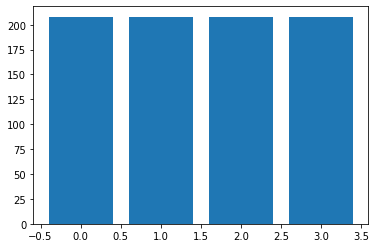

In [12]:
# τεχνική υπερδειγματοληψίας SMOTE 
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE(random_state=7)
X, Y = oversample.fit_resample(X, Y)
# summarize distribution
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()


In [13]:
# διαχωρισμός δεδομένων σε train και test set (μέθοδος hold-out)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [14]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state = 42)
clf.fit(X_train,Y_train)
y_pred=clf.predict(X_test)

In [15]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))

Accuracy: 0.852


In [16]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        69
           1       0.76      0.80      0.78        69
           2       0.92      0.85      0.88        66
           3       0.87      0.98      0.92        46

    accuracy                           0.85       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.85      0.85      0.85       250



In [17]:
# προφαν΄ώς αναμένουμε υπερεκπαίδευση αφού τα δέντρα στο τυχαίο δάσος είναι μη κλαδεμένα.
clf.score(X_train,Y_train)

1.0

In [18]:
# Feature importance
feature_list=list(X.columns)
feature_imp=pd.Series(clf.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

MOCA-1                     0.069917
Vlong_M_r                  0.065413
MOCA-11                    0.057009
Vshort_M_r                 0.052209
Verb_Flu_r                 0.045335
Induct_Reason_r            0.044432
Age                        0.041898
MOCA-6                     0.038529
MOCA-10                    0.034520
MOCA-9                     0.033177
Work_M_r                   0.033072
Concentration_attention    0.028859
MOCA-4                     0.026349
MOCA-7                     0.026293
MOCA-2                     0.025197
education                  0.024233
NPIJ40S                    0.020761
GDS_9                      0.019742
NPIJ36S                    0.019375
Prosp_M_r                  0.016612
NPIJ40F                    0.015095
GDS_10                     0.012981
Antidepressants            0.012765
NPIJ35F                    0.012100
GDS_2                      0.012020
NPIJ36F                    0.011210
MOCA-8                     0.010768
GDS_5                      0

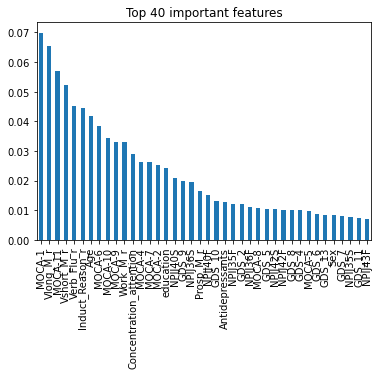

In [19]:
# feature importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [20]:
from numpy import std
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [21]:
# nested cv (αργεί ελάχιστα)
clf=RandomForestClassifier(random_state = 42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)
cv_inner = KFold(n_splits=3, shuffle=True, random_state=1)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6, 8, 10, 'sqrt']
search = GridSearchCV(clf, space, scoring='recall_micro', n_jobs=1, cv=cv_inner, refit=True)
scores = cross_val_score(search, X, Y, scoring='recall_micro', cv=cv_outer, n_jobs=-1)
# report performance
print('f1-micro score: %.3f (%.3f)' % (mean(scores), std(scores)))

f1-micro score: 0.880 (0.035)


In [22]:
search.fit(X, Y)
search.best_params_

{'max_features': 2, 'n_estimators': 500}

In [23]:
bestforest=search.best_estimator_
bestforest

RandomForestClassifier(max_features=2, n_estimators=500, random_state=42)

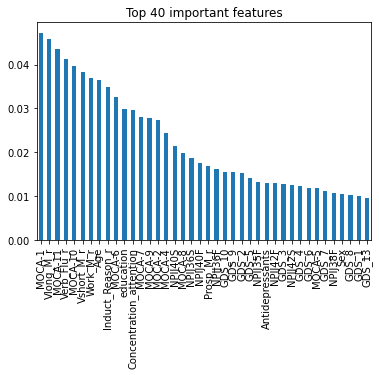

In [24]:
# feature importance για το bestforest
feat_importances = pd.Series(bestforest.feature_importances_, index=X.columns)
feat_importances.nlargest(40).plot(kind='bar')
plt.title("Top 40 important features")
plt.show()

In [25]:
# κ΄άνουμε προβλέψεις...
bestforest.predict(X_test)

array([1, 0, 1, 0, 2, 1, 0, 2, 2, 2, 3, 2, 1, 1, 1, 0, 1, 2, 0, 2, 1, 0,
       0, 3, 3, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 3, 1, 0, 0, 1, 3, 0, 0, 0,
       0, 1, 2, 1, 0, 0, 3, 1, 2, 3, 1, 1, 3, 1, 0, 2, 1, 0, 3, 1, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 0, 3, 2, 2, 1, 2, 3, 2, 3, 1, 2, 3, 3, 1,
       1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 3, 1, 1, 2, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 3, 3, 2, 3, 2, 1, 2, 0, 1, 1, 0, 2,
       1, 1, 0, 3, 2, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 2, 1, 3, 0, 1, 2, 1,
       1, 3, 3, 1, 0, 3, 0, 1, 1, 1, 3, 1, 0, 3, 3, 0, 0, 0, 2, 1, 2, 2,
       2, 1, 0, 3, 0, 2, 1, 2, 3, 2, 0, 0, 1, 3, 0, 1, 2, 3, 2, 1, 0, 1,
       2, 0, 3, 2, 0, 3, 1, 0, 1, 3, 0, 3, 0, 3, 1, 2, 2, 2, 2, 1, 2, 0,
       1, 0, 2, 1, 3, 2, 3, 2, 0, 0, 3, 3, 1, 0, 3, 0, 1, 0, 2, 1, 0, 0,
       2, 3, 2, 1, 0, 0, 3, 3], dtype=int64)

In [26]:
bestforest.estimators_

[DecisionTreeClassifier(max_features=2, random_state=1608637542),
 DecisionTreeClassifier(max_features=2, random_state=1273642419),
 DecisionTreeClassifier(max_features=2, random_state=1935803228),
 DecisionTreeClassifier(max_features=2, random_state=787846414),
 DecisionTreeClassifier(max_features=2, random_state=996406378),
 DecisionTreeClassifier(max_features=2, random_state=1201263687),
 DecisionTreeClassifier(max_features=2, random_state=423734972),
 DecisionTreeClassifier(max_features=2, random_state=415968276),
 DecisionTreeClassifier(max_features=2, random_state=670094950),
 DecisionTreeClassifier(max_features=2, random_state=1914837113),
 DecisionTreeClassifier(max_features=2, random_state=669991378),
 DecisionTreeClassifier(max_features=2, random_state=429389014),
 DecisionTreeClassifier(max_features=2, random_state=249467210),
 DecisionTreeClassifier(max_features=2, random_state=1972458954),
 DecisionTreeClassifier(max_features=2, random_state=1572714583),
 DecisionTreeClass

# ΟVO και ΟVR (ή OVA)

In [36]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score


In [37]:
# εκπαίδευση αλγορίθμου ΟVO με τις προεπιλεγμένες υπερπαραμέτρους του δέντρου απόφασης
clf= OneVsOneClassifier(RandomForestClassifier(random_state=60))
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Precision-micro of OvO Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvO Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvO Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvO Classifier: 0.85
Recall-micro of OvO Classifier: 0.85
f1-micro of OvO Classifier: 0.85


In [39]:
# nested cv για ΟVO
# aργεί πολύ
# για τον συντονισμό των υπερπαραμέτρων με τους ταξινομητές OVO και OVR χρησιμοποιείται το πρόθεμα 'estimator__' για κάθε υπερπαράμετρο που ελέγχουμε
clf=OneVsOneClassifier(RandomForestClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__n_estimators']=[10, 100, 500]
space['estimator__max_features']=[2, 4, 6, 8, 10, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.9047619 , 0.88095238, 0.84337349, 0.80722892, 0.89156627,
       0.86746988, 0.86746988, 0.85542169, 0.89156627, 0.87951807])

In [40]:
nested_scores.mean()

0.8689328743545612

In [41]:
clf= OneVsRestClassifier(RandomForestClassifier(random_state=4))
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)

print('Precision-micro of OvR Classifier: {:.2f}'.format(precision_score(Y_test, y_pred, average='micro')))
print('Recall-micro of OvR Classifier: {:.2f}'.format(recall_score(Y_test, y_pred, average='micro')))
print('f1-micro of OvR Classifier: {:.2f}'.format(f1_score(Y_test, y_pred, average='micro')))

Precision-micro of OvR Classifier: 0.86
Recall-micro of OvR Classifier: 0.86
f1-micro of OvR Classifier: 0.86


In [42]:
# nested cv για ΟVR
# aργεί πολύ
# για τον συντονισμό των υπερπαραμέτρων με τους ταξινομητές OVO και OVR χρησιμοποιείται το πρόθεμα 'estimator__' για κάθε υπερπαράμετρο που ελέγχουμε
clf=OneVsOneClassifier(RandomForestClassifier(random_state=6))
inner_cv = KFold(n_splits=5, shuffle= True, random_state=1)
outer_cv = KFold(n_splits=10, shuffle=True, random_state=1)
space=dict()
space['estimator__n_estimators']=[10, 100, 500]
space['estimator__max_features']=[2, 4, 6, 8, 10, 'sqrt']
space['estimator__criterion']=['gini','entropy']
search = GridSearchCV(clf, space, scoring='f1_micro', n_jobs=-1, cv=inner_cv, refit=True)
search.fit(X, Y)

nested_scores=cross_val_score(search, X, Y, scoring='f1_micro', cv=outer_cv, n_jobs=-1,error_score="raise")
nested_scores

array([0.9047619 , 0.88095238, 0.84337349, 0.80722892, 0.89156627,
       0.86746988, 0.86746988, 0.85542169, 0.89156627, 0.87951807])

In [43]:
nested_scores.mean()

0.8689328743545612

In [44]:
bestforest1=search.best_estimator_
bestforest1

OneVsOneClassifier(estimator=RandomForestClassifier(criterion='entropy',
                                                    max_features=4,
                                                    random_state=6))

# OOB score

In [32]:

clf=RandomForestClassifier(n_estimators=500,random_state = 42,oob_score = True)
clf.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42)

In [33]:
# Το OOB score είναι εναλλακτική μετρική για έλεγχο της ακρίβειας 
print(clf.oob_score_)

0.8608247422680413


In [34]:
print('Score: ', clf.score(X_test, Y_test))

Score:  0.868


# LIME/SHAP

# LIME explanations

In [30]:
!pip install lime

In [31]:
# LIME
import lime
from lime import lime_tabular
explainer=lime_tabular.LimeTabularExplainer(training_data=X_train.values,
                                           mode='classification',
                                           feature_names=X_train.columns.values,
                                            verbose=True,
                                           random_state=34)

In [32]:
# ερμηνεία για την πρόβλεψη της 2ης παρατήρησης (j=1) του συνόλου δοκιμής
# προεπιλογή για num_features είναι το 10
# για top_labels=2 θα εμφανιστούν τα αποτελέσματα για τις δύο πιο σημαντικές κλάσεις που προέβλεψε το μοντέλο (προφανώς μόνο μία προβλέπει αφού δεν είναι multi-label πρόβλημα)
# για top_labels=1 εμφανίζουμε μόνο την κλάση που προέβλεψε το μοντέλο (δηλα΄δή εκείνη με τη μεγαλύτερη πιθανότητα)
j=1
exp=explainer.explain_instance(data_row=X_test.iloc[j],
                              predict_fn=bestforest.predict_proba,top_labels=1)
exp.show_in_notebook(show_table=True)

C:\Users\BILL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Intercept 0.06494793334773247
Prediction_local [0.24312066]
Right: 0.824


In [33]:
X_test.iloc[1:2]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
378,82,2,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0,0.0,0,0,0.0,0,1,3,1.0,3.0,0,0,0,0,0,0,1.0,3.0,0,0,0.0,0.0,0,0,1,6,8,10,16,2,5.0


In [34]:
# η πραγματική τιμή για την κλάση της 2ης παρατήρησης του συνόλου δοκιμής
Y_test.iloc[1:2]

378    0
Name: diagnosis, dtype: int64

In [35]:
# κάνουμε προβλέψεις (η πρόβλεψη της 2ης παρατήρησης απο το σύνολο δοκιμής)
out=bestforest.predict(X_test)
out[1]

0

# SHAP

In [40]:
!pip install shap

In [41]:
import shap
shap.initjs()

In [42]:
# υπολογισμός των shapley values μέσω του μοντέλου SHAP για κάθε παρατήρηση του συνόλου δοκιμής Χ_test (θα μπορο΄ύσαμε να βάλουμε ολόκληρο το σύνολο δεδομένων ή το train set)
# το shap.TreeExplainer επιταχύνει τους υπολογισμούς των τιμών Shapley 
class_names = ['0', '1', '2', '3']
explainer=shap.TreeExplainer(bestforest)
shap_values = explainer.shap_values(X_test)
shap_values

[array([[-0.00066426,  0.00014385, -0.03078021, ..., -0.02955169,
          0.01165267,  0.01439407],
        [-0.01930347,  0.00938991, -0.02392616, ...,  0.02465405,
          0.02405091,  0.02392899],
        [ 0.01228027,  0.00294492, -0.00706029, ...,  0.00625431,
         -0.04283907,  0.01609094],
        ...,
        [ 0.02217859, -0.00642979,  0.02477003, ...,  0.03306049,
          0.05030487,  0.02568882],
        [ 0.00634401, -0.00810647,  0.00630088, ..., -0.02271601,
          0.02472448, -0.009303  ],
        [-0.01081036, -0.0068865 , -0.01257596, ...,  0.00941949,
         -0.02798111, -0.01321642]]),
 array([[ 0.01055994,  0.01021266,  0.03550386, ...,  0.00955156,
          0.02191497,  0.00860834],
        [ 0.01049158,  0.00027673,  0.02245548, ...,  0.00456116,
          0.00815643, -0.00387499],
        [-0.00018558,  0.01169538,  0.01052336, ...,  0.02429159,
          0.03506412,  0.00710868],
        ...,
        [-0.01093428, -0.00324314, -0.01574108, ..., -

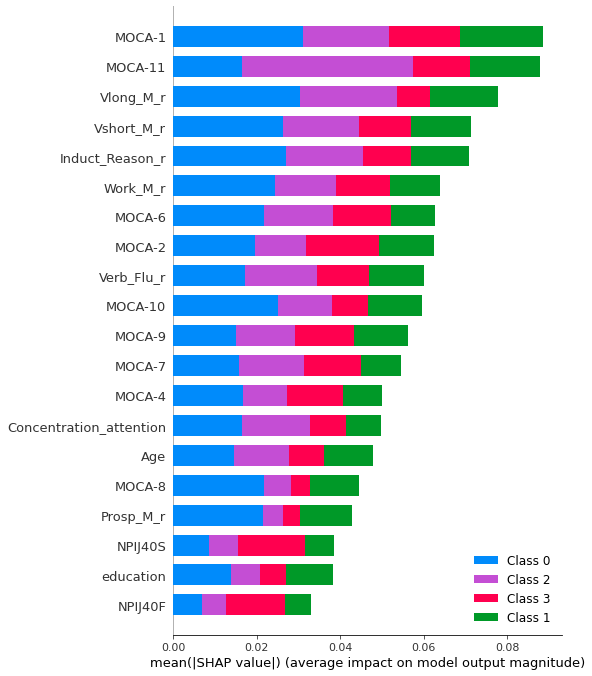

In [43]:
# feature importance (ολική ερμηνεία)
# εκτός απο το κλασικό feature importance έχουμε και την επίδραση της κάθε μεταβλητής ανά κλάση εξόδου
shap.summary_plot(shap_values[0:], X_test, plot_type="bar")

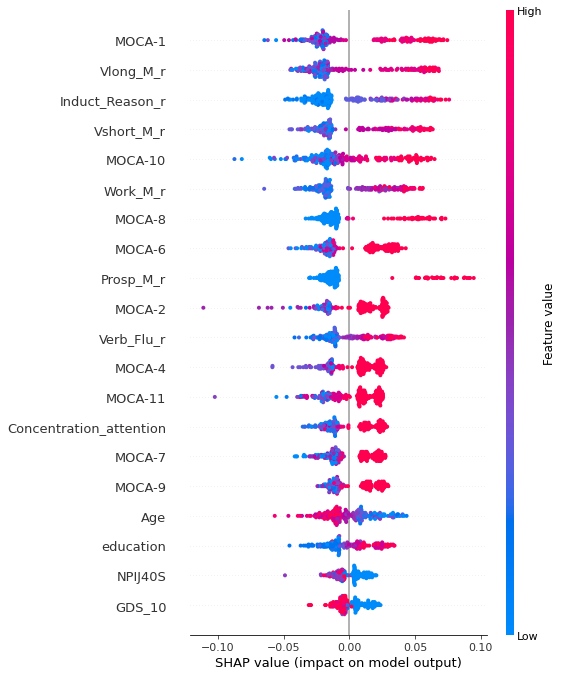

In [44]:
# global (το ίδιο με πριν είναι το σχήμα)
# Καθένα απο τα σημεία στο summary plot είναι η τιμή Shapley ενός χαρακτηριστικού για ένα παράδειγμα
# συνδυάζεται το feature importance με την επίδραση της κάθε μεταβλητής/χαρακτηριστικού
# αφορά την κλάση "0"
shap.summary_plot(shap_values[0], X_test.values, feature_names = X.columns)

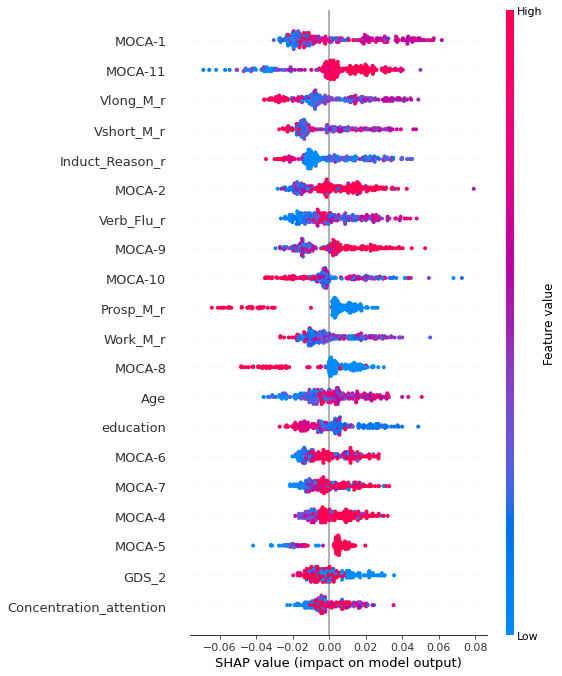

In [45]:
# global (το ίδιο με πριν είναι το σχήμα)
# Καθένα απο τα σημεία στο summary plot είναι η τιμή Shapley ενός χαρακτηριστικού για ένα παράδειγμα
# συνδυάζεται το feature importance με την επίδραση της κάθε μεταβλητής/χαρακτηριστικού
# αφορά την κλάση "1"
shap.summary_plot(shap_values[1], X_test.values, feature_names = X.columns)

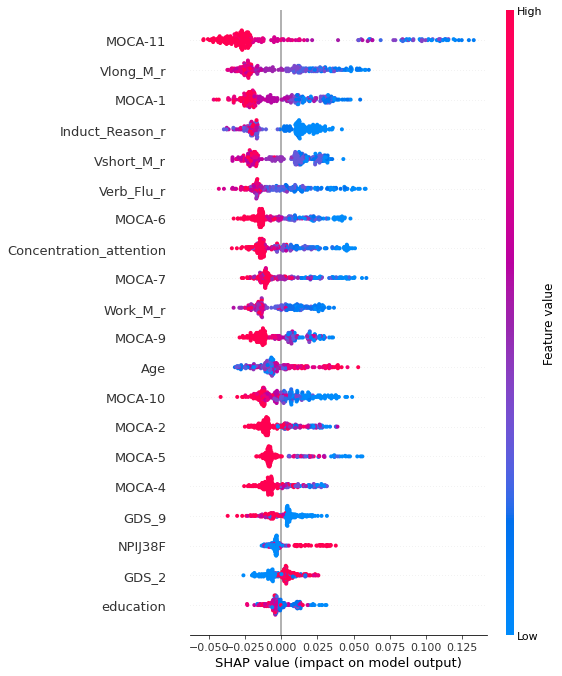

In [46]:
# global (το ίδιο με πριν είναι το σχήμα)
# Καθένα απο τα σημεία στο summary plot είναι η τιμή Shapley ενός χαρακτηριστικού για ένα παράδειγμα
# συνδυάζεται το feature importance με την επίδραση της κάθε μεταβλητής/χαρακτηριστικού
# αφορά την κλάση "2"
shap.summary_plot(shap_values[2], X_test.values, feature_names = X.columns)

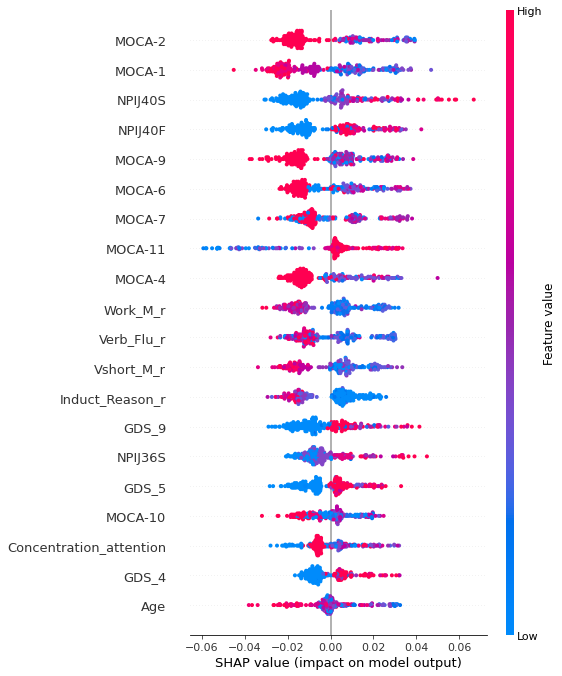

In [47]:
# global (το ίδιο με πριν είναι το σχήμα)
# Καθένα απο τα σημεία στο summary plot είναι η τιμή Shapley ενός χαρακτηριστικού για ένα παράδειγμα
# συνδυάζεται το feature importance με την επίδραση της κάθε μεταβλητής/χαρακτηριστικού
# αφορά την κλάση "3"
shap.summary_plot(shap_values[3], X_test.values, feature_names = X.columns)

In [48]:
# local επεξήγηση για την 2η παρατήρηση του συνόλου δοκιμής (για την ακρίβεια είναι η 378η παρατήρηση του αρχικού συνόλου Χ)
i=1
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X_test.values[i], feature_names = X.columns)

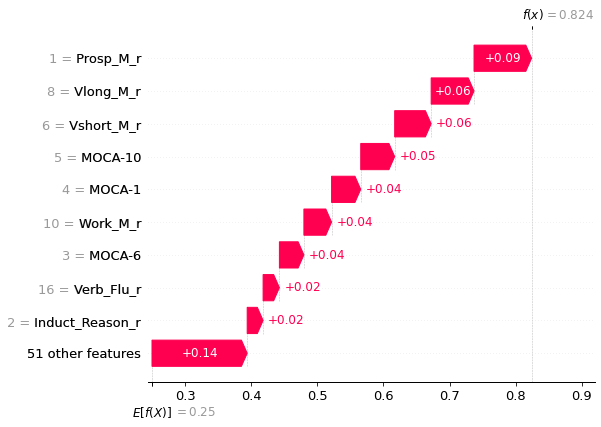

In [49]:
# local επεξήγηση για την 2η παρατήρηση του συνόλου δοκιμής (εναλλακτικό σχήμα-προτιμητέο_)
row =1
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],  
                                         feature_names=X_test.columns.tolist()))

In [50]:
X_test.iloc[1:2]

,Age,Sex,education,GDS_1,GDS_2,GDS_3,GDS_4,GDS_5,GDS_6,GDS_7,GDS_8,GDS_9,GDS_10,GDS_11,GDS_12,GDS_13,GDS_14,GDS_15,Antidepressants,MOCA-1,MOCA-2,MOCA-4,MOCA-5,MOCA-6,MOCA-7,MOCA-8,MOCA-9,MOCA-10,MOCA-11,NPIJ32S,NPIJ32F,NPIJ33S,NPIJ33F,NPIJ34S,NPIJ34F,NPIJ35S,NPIJ35F,NPIJ36S,NPIJ36F,NPIJ37S,NPIJ37F,NPIJ38S,NPIJ38F,NPII39J,NPIJ39F,NPIJ40S,NPIJ40F,NPIJ41S,NPIJ41F,NPIJ42S,NPIJ42F,NPIJ43S,NPIJ43F,Prosp_M_r,Vshort_M_r,Vlong_M_r,Work_M_r,Verb_Flu_r,Induct_Reason_r,Concentration_attention
378,82,2,6.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,2.0,1.0,3.0,1.0,0.0,1.0,5.0,6.0,0,0.0,0,0,0.0,0,1,3,1.0,3.0,0,0,0,0,0,0,1.0,3.0,0,0,0.0,0.0,0,0,1,6,8,10,16,2,5.0
